<a href="https://colab.research.google.com/github/anjali88/Basic-ML-/blob/master/Pushpanjali_Banik_Scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Excercise 1
#Import statements
#import scikit learn libraries when the are required to understand which specifc libraries are required
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np

#load classification dataset
class_data = load_breast_cancer()
class_X = pd.DataFrame(class_data.data, columns = class_data.feature_names)
class_y = class_data.target

#check the data has loaded successfully
print(class_X.shape)
print(class_y.shape)


(569, 30)
(569,)


In [2]:
#load the regression dataset
boston = load_boston()
boston_X = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_y = boston.target

##check the data has loaded successfully
print(boston_X.shape)
print(boston_y.shape)

(506, 13)
(506,)


In [90]:
#Excercise 2 - Rescaling and Standardizing Data
# Rescaling using MinMaxScaler, which converts data to a specified range, usually (0,1) or (-1,1)
# many machine learning algorithms assume data is on the same scale
#import minmaxscaler
from sklearn.preprocessing import MinMaxScaler
#create feature - use one feature but may pass all the features to rescaler
feature = class_X['texture error']
#print feature prior to rescaling
print("Features prior to rescaling:\n")
print(feature[0:8])
#print the shape
print("\nFeature shape prior to reshaping:")
print(feature.shape)


Features prior to rescaling:

0    0.9053
1    0.7339
2    0.7869
3    1.1560
4    0.7813
5    0.8902
6    0.7732
7    1.3770
Name: texture error, dtype: float64

Feature shape prior to reshaping:
(569,)


In [0]:
# we used a pandas column, so data data has wrong shape for the function
# we need a 2D tuple
#reshape the data
feature = feature.values.reshape(-1,1)

# notice we now have a (samples,feature) tuple not just a (samples,) tuple
print("\nFeature shape after reshaping:")
feature.shape


Feature shape after reshaping:


(569, 1)

In [0]:
#instantiate the scaler and pass in the range we want our value to be scaled within
minmax_scale = MinMaxScaler(feature_range=(0,1))
#Scale the feature - note the fit transform function, in the next example we will separate these steps
scaled_feature = minmax_scale.fit_transform(feature)
#view feautures we have rescaled
print("Features after  rescaling:\n")
scaled_feature[0:8]

Features after  rescaling:



array([[0.12046941],
       [0.08258929],
       [0.09430251],
       [0.17587518],
       [0.09306489],
       [0.11713225],
       [0.09127475],
       [0.22471711]])

In [0]:
#standardising rescale features so that they are normally distributed. with a mean of 0 and std. deviation of 1
#import appropriate library
from sklearn.preprocessing import StandardScaler

#transform all features in dataset, look at it before transformation
mean_std = pd.DataFrame(data={'mean':class_X.mean(), 'std':class_X.std()})

#call dataframe
mean_std[0:8]

,mean,std
mean radius,14.127292,3.524049
mean texture,19.289649,4.301036
mean perimeter,91.969033,24.298981
mean area,654.889104,351.914129
mean smoothness,0.096360,0.014064
mean compactness,0.104341,0.052813
mean concavity,0.088799,0.079720
mean concave points,0.048919,0.038803


In [0]:
#create scaler
scaler = StandardScaler()

#fit the scaler - this calculates the min and max values of the dates
scaler.fit(class_X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
# transform the data using the fitted scaler - this applies the transform using the fit
standardized = scaler.transform(class_X)
# this shows the features transformed - note that this returns an array not a dataframe
standardized[0:8]

array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00,
         9.84374905e-01,  1.56846633e+00,  3.28351467e+00,
         2.65287398e+00,  2.53247522e+00,  2.21751501e+00,
         2.25574689e+00,  2.48973393e+00, -5.65265059e-01,
         2.83303087e+00,  2.48757756e+00, -2.14001647e-01,
         1.31686157e+00,  7.24026158e-01,  6.60819941e-01,
         1.14875667e+00,  9.07083081e-01,  1.88668963e+00,
        -1.35929347e+00,  2.30360062e+00,  2.00123749e+00,
         1.30768627e+00,  2.61666502e+00,  2.10952635e+00,
         2.29607613e+00,  2.75062224e+00,  1.93701461e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00,
         1.90870825e+00, -8.26962447e-01, -4.87071673e-01,
        -2.38458552e-02,  5.48144156e-01,  1.39236330e-03,
        -8.68652457e-01,  4.99254601e-01, -8.76243603e-01,
         2.63326966e-01,  7.42401948e-01, -6.05350847e-01,
        -6.92926270e-01, -4.40780058e-01,  2.60162067e-01,
        -8.05450380e-01, -9.94437403e-02,  1.80592744e+

In [0]:
#have another look at the transformed data
mean_std_transformed = pd.DataFrame(data={'mean':standardized.mean(), 'std':standardized.std()}, index=class_X.columns)

# call the dataframe
mean_std_transformed[0:8]

,mean,std
mean radius,-6.118909e-16,1.0
mean texture,-6.118909e-16,1.0
mean perimeter,-6.118909e-16,1.0
mean area,-6.118909e-16,1.0
mean smoothness,-6.118909e-16,1.0
mean compactness,-6.118909e-16,1.0
mean concavity,-6.118909e-16,1.0
mean concave points,-6.118909e-16,1.0


In [0]:
#Excercise 2 - Rescaling and Standardization
load_boston()

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [91]:
Class1 = load_boston()
Class1_X = pd.DataFrame(Class1.data, columns = Class1.feature_names) #features
Class1_y = Class1.target # labels
print(Class1_X.shape)
print(Class1_y.shape) #  check if data loaded successfully

# FEATURE RESCALING
from sklearn.preprocessing import MinMaxScaler # import required library
#create feature - use one feature but may pass all the features to rescaler
F1 = Class1_X['TAX']

#print feature prior to rescaling
print("Features prior to rescaling:\n")
print(F1[0:10])

#print the shape
print("\nFeature shape prior to reshaping:")
print(F1.shape)
#Reshape the data into 2D tuple for the function
F1 = F1.values.reshape(-1,1)
print("\nFeature shape after reshaping: ")
print(F1.shape)
F1[0:10]

# instantiate the scaler and pass the feature range 
minmax_scale = MinMaxScaler(feature_range=(0, 1))
#Scale the feature - note the fit transform function, in the next example we will separate these steps
scaled_F1 = minmax_scale.fit_transform(F1)
#view feautures we have rescaled
print("Features after  rescaling:\n")
scaled_F1[0:10]

#STANDARDISING - using Standardscaler
#standardise the features to be normally distributed. with a mean of 0 and std. deviation of 1
from sklearn.preprocessing import StandardScaler # import appropriate library
mean_std = pd.DataFrame(data={'mean':Class1_X.mean(), 'std':Class1_X.std()}) # transform all the features in the dataset
mean_std[0:10] # call the dataframe
print()
scaler = StandardScaler() #create the standard scaler
scaler.fit(Class1_X) #fit the scaler - this calculates the min and max values of the dates
standardized1 = scaler.transform(Class1_X) # transform the data using the fitted scaler - this applies the transform using the fit
standardized1[0:8]# this shows the features transformed - note that this returns an array not a dataframe
mean_std_transformed = pd.DataFrame(data={'mean':standardized1.mean(), 'std':standardized1.std()}, index=Class1_X.columns) #have another look at the transformed data
mean_std_transformed[0:10] # call the dataframe

(506, 13)
(506,)
Features prior to rescaling:

0    296.0
1    242.0
2    242.0
3    222.0
4    222.0
5    222.0
6    311.0
7    311.0
8    311.0
9    311.0
Name: TAX, dtype: float64

Feature shape prior to reshaping:
(506,)

Feature shape after reshaping: 
(506, 1)
Features after  rescaling:




,mean,std
CRIM,-1.114746e-15,1.0
ZN,-1.114746e-15,1.0
INDUS,-1.114746e-15,1.0
CHAS,-1.114746e-15,1.0
NOX,-1.114746e-15,1.0
RM,-1.114746e-15,1.0
AGE,-1.114746e-15,1.0
DIS,-1.114746e-15,1.0
RAD,-1.114746e-15,1.0
TAX,-1.114746e-15,1.0


In [92]:
# NORMALIZER
# Normalize samples individually to unit norm.
# Each sample (i.e. each row of the data matrix) with at least one non zero component is rescaled independently of other samples so that its norm (l1 or l2) equals one.
# Scaling inputs to unit norms is a common operation for text classification or clustering for instance
from sklearn.preprocessing import Normalizer #import appropriate library
transformer = Normalizer().fit(Class1_X) # fit does nothing
print(transformer)
normalised = transformer.transform(Class1_X)
print(normalised)
mean_std_transformed = pd.DataFrame(data={'mean':normalised.mean(), 'std':normalised.std()}, index=Class1_X.columns) #have another look at the transformed data
mean_std_transformed[0:10] # call the dataframe

Normalizer(copy=True, norm='l2')
[[1.26388341e-05 3.59966795e-02 4.61957387e-03 ... 3.05971776e-02
  7.93726783e-01 9.95908132e-03]
 [5.78529889e-05 0.00000000e+00 1.49769546e-02 ... 3.77071843e-02
  8.40785474e-01 1.93620036e-02]
 [5.85729947e-05 0.00000000e+00 1.51744622e-02 ... 3.82044450e-02
  8.43137761e-01 8.64965806e-03]
 ...
 [1.23765824e-04 0.00000000e+00 2.43009593e-02 ... 4.27762066e-02
  8.08470305e-01 1.14884669e-02]
 [2.24644719e-04 0.00000000e+00 2.44548909e-02 ... 4.30471676e-02
  8.06519433e-01 1.32831260e-02]
 [9.69214289e-05 0.00000000e+00 2.43887924e-02 ... 4.29308164e-02
  8.11392431e-01 1.61092778e-02]]


,mean,std
CRIM,0.123567,0.248303
ZN,0.123567,0.248303
INDUS,0.123567,0.248303
CHAS,0.123567,0.248303
NOX,0.123567,0.248303
RM,0.123567,0.248303
AGE,0.123567,0.248303
DIS,0.123567,0.248303
RAD,0.123567,0.248303
TAX,0.123567,0.248303


In [3]:
#Model Evaluation and Metrics
#testing and training splits
from sklearn.model_selection import train_test_split
# splits data into a test and training set
# function shuffles our data before splitting (we will get both classes in both sets)
# setting a random_state means that this shuffling will be consistent for each run
#setting stratify=class_y tells the function to have an even number of class labels in each set
X_train, X_test, y_train, y_test = train_test_split(class_X,class_y, test_size=0.3, random_state=1, stratify = class_y)

# verify the stratifications using np.bincount
print('Labels counts in y:', np.bincount(class_y))
print('Percentage of class zeroes in class_y',np.round(np.bincount(class_y)[0]/len(class_y)*100))

print("\n")
print('Labels counts in y_train:', np.bincount(y_train))
print('Percentage of class zeroes in y_train',np.round(np.bincount(y_train)[0]/len(y_train)*100))

print("\n")
print('Labels counts in y_test:', np.bincount(y_test))
print('Percentage of class zeroes in y_test',np.round(np.bincount(y_test)[0]/len(y_test)*100))

Labels counts in y: [212 357]
Percentage of class zeroes in class_y 37.0


Labels counts in y_train: [148 250]
Percentage of class zeroes in y_train 37.0


Labels counts in y_test: [ 64 107]
Percentage of class zeroes in y_test 37.0


Additional ways to divide data into test and training sets exist, and we cover K-fold cross validation in the Pipeline section

In [0]:
#create a basiline model to benchmark our other estimators against
#this can be simple estimator or we can use a dummy estimator to make predictions in a random manner
#import appropriate statement
from sklearn.dummy import DummyClassifier
# creates our dummy classifier and the value we pass in to the strategy
dummy = DummyClassifier(strategy='uniform', random_state=1)
dummy.fit(X_train,y_train) # #train the model

DummyClassifier(constant=None, random_state=1, strategy='uniform')

In [0]:
#evaluate model metrics
dummy.score(X_test, y_test) # get an accuracy score

0.47953216374269003

Remember that to get a score, we need to instantiate a model, fit it to the data, predict using unseen data, compare the predictions against actual data, and score the difference. This is true for classification and regression problems, and is true no matter the method used to get there.

* So, in the end-to-end tutorials we split the training and test data, fitted our data to an estimator, and called the .predict method on the estimator to get our predictions, and then passed this to a scoring function (four steps)
* In using the estimator.score() method above, we are passing in our split data and the method is then making predictions and returning the score (three steps).
* In the cross_val_score() method used below we are effectively using one step as the method takes an estimator and our data and returns a score.

In [0]:
#hide all warnings
import warnings
warnings.filterwarnings('ignore')
#fit a new estimator and use cross_val_score to get a score based defined metric
#import statements
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression() # instantiate logistic regression classifier

#pass estimator and data to the method. also specify the number of folds (default is 3)
# the default scoring method is associated with the estimator we pass in
# use scoring parameter to pass in different scoring methods. here we use recall
cross_val_score(logistic, class_X, class_y, cv=5, scoring="recall")

array([0.98611111, 0.97222222, 0.98591549, 0.95774648, 0.95774648])

In [0]:
#Excercise 3

#Part 1 -Implement binary classification scoring functions

#Implement f1 score - also known as balanced F-score or F-measure
# F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:
# F1 = 2 * (precision * recall) / (precision + recall) 
#import appropriate statements
from sklearn.metrics import f1_score

f1 = cross_val_score(logistic, class_X, class_y, cv=5, scoring='f1') 
print('f1')
print(f1)
f1macro = cross_val_score(logistic, class_X, class_y, cv=5, scoring='f1_macro') #Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
print('f1macro')
print(f1macro)
f1micro = cross_val_score(logistic, class_X, class_y, cv=5, scoring='f1_micro') #Calculate metrics globally by counting the total true positives, false negatives and false positives.
print('f1micro')
print(f1micro)
f1weighted = cross_val_score(logistic, class_X, class_y, cv=5, scoring='f1_weighted') #Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.
print('f1weighted')
print(f1weighted)


##implement precision score
#The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
#The best value is 1 and the worst value is 0.
#import appropriate statements
from sklearn.metrics import precision_score
precision = cross_val_score(logistic, class_X, class_y, cv=5, scoring='precision') 
print('precision')
print(precision)
precisionmacro = cross_val_score(logistic, class_X, class_y, cv=5, scoring='precision_macro') #Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account
print('precisionmacro')
print(precisionmacro)
precisionmicro = cross_val_score(logistic, class_X, class_y, cv=5, scoring='precision_micro') #Calculate metrics globally by counting the total true positives, false negatives and false positives.
print('precisionmicro')
print(precisionmicro)
precisionweighted = cross_val_score(logistic, class_X, class_y, cv=5, scoring='precision_weighted') #Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.
print('precisionweighted')
print(precisionweighted)

f1
[0.94666667 0.95238095 0.97902098 0.96453901 0.97142857]
f1macro
[0.92333333 0.9340218  0.9714382  0.95285774 0.96245847]
f1micro
[0.93043478 0.93913043 0.97345133 0.95575221 0.96460177]
f1weighted
[0.92921739 0.9386515  0.97338422 0.95585559 0.96476053]
precision
[0.91025641 0.93333333 0.97222222 0.97142857 0.98550725]
precisionmacro
[0.94161469 0.94166667 0.97391599 0.95083056 0.95866271]
precisionmicro
[0.93043478 0.93913043 0.97345133 0.95575221 0.96460177]
precisionweighted
[0.93370695 0.93956522 0.97348131 0.95611678 0.96555202]


In [0]:
# Part 2
#Assessing our model's performance with the Receiving Operating Characteristic (ROC) Curve.

A useful tool when predicting the probability of a binary outcome is the Receiver Operating Characteristic curve, or ROC curve. 
It is a plot of the false positive rate (x-axis) versus the true positive rate (y-axis) for a number of different candidate threshold values between 0.0 and 1.0. Put another way, it plots the false alarm rate versus the hit rate.

The true positive rate is calculated as the number of true positives divided by the sum of the number of true positives and the number of false negatives. It describes how good the model is at predicting the positive class when the actual outcome is positive.


* *True Positive Rate* = True Positives / (True Positives + False Negatives)

The true positive rate is also referred to as sensitivity.

* *Sensitivity* = True Positives / (True Positives + False Negatives)

The false positive rate is calculated as the number of false positives divided by the sum of the number of false positives and the number of true negatives. It is also called the false alarm rate as it summarizes how often a positive class is predicted when the actual outcome is negative.

* False Positive Rate = False Positives / (False Positives + True Negatives)

The false positive rate is also referred to as the inverted specificity where specificity is the total number of true negatives divided by the sum of the number of true negatives and false positives.

* Specificity = True Negatives / (True Negatives + False Positives)  
Where:            False Positive Rate = 1 - Specificity
      
The ROC curve is a useful tool for a few reasons:
* The curves of different models can be compared directly in general or for different thresholds.
* The area under the curve (AUC) can be used as a summary of the model skill.
The shape of the curve contains a lot of information, including what we might care about most for a problem, the expected false positive rate, and the false negative rate. To make this clear: a. Smaller values on the x-axis of the plot indicate lower false positives and higher true negatives. b. Larger values on the y-axis of the plot indicate higher true positives and lower false negatives.

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=1, shrinking=True, tol=0.001,
    verbose=False)
[-1.06923266e+00 -1.29891176e+00  5.61895210e+00 -3.86980040e+00
 -1.88558814e-01 -6.25936209e+00 -3.95054394e+00  9.59540708e-02
  4.01447965e+00  3.82038204e+00  3.63341162e+00 -4.38891749e+00
 -2.94887382e+00  4.40562556e+00  8.43109984e-01  3.42275087e-01
  2.99971461e+00  3.36922732e+00  6.23624054e+00 -7.38527470e+00
  4.40167439e+00  2.50609190e+00 -1.27530280e+00  2.87881002e+00
 -3.03204447e+00  1.10942621e+00  2.46355750e+00 -1.04239785e+01
 -1.81838538e+01 -2.87980800e+00 -8.53657025e+00  5.51272883e+00
 -1.00605766e+01 -4.06640033e+00  4.91427365e+00  3.74079660e+00
 -4.43476802e+00  2.75477264e+00 -5.31823157e-01  4.99311746e+00
  6.74786021e+00  9.72271499e-01  1.96420850e+00  4.41307146e+00
  2.78465875e+00 -2.67312982e+00  7.

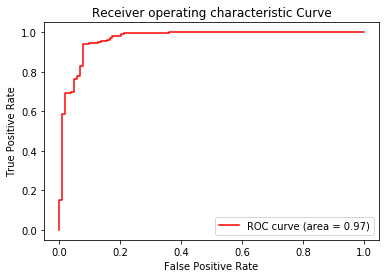

In [4]:
# import roc_curve() to plot a ROC curve. 
# The function takes both the true outcomes (0,1) from the test set and the predicted probabilities for the 1 class. The function returns the false positive rates for each threshold, true positive rates for each threshold and thresholds.
from sklearn.metrics import roc_curve 
# import roc_auc_score() to calculate AUC for ROC
# AUC function takes both the true outcomes (0,1) from the test set and the predicted probabilities for the 1 class. It returns the AUC score between 0.0 and 1.0 for no skill and perfect skill respectively.
from sklearn.metrics import roc_auc_score 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import svm
#shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(class_X,class_y, test_size=0.5, random_state=1)
logistic = LogisticRegression()
#predict
Predict_Y = svm.SVC(kernel='linear', probability=True, random_state=1)
print(Predict_Y)
score_Y = Predict_Y.fit(X_train, y_train).decision_function(X_test)
print(score_Y)
#compute ROC curve and ROC area
fpr, tpr, threshold = roc_curve(y_test, score_Y)
roc_auc = roc_auc_score(y_test, score_Y)
print(roc_auc)
plt.figure()
plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Curve')
plt.legend(loc="lower right")
plt.show()

In [0]:
# What are the main ways of evaluating a mutliclass classification problem?

Micro-averaging may be preferred in multilabel settings, including multiclass classification where a majority class is to be ignored.

In multiclass classification task, the notions of precision, recall, and F-measures can be applied to each label independently. 
* Note that if all labels are included, “micro”-averaging in a multiclass setting will produce precision, recall and  that are all identical to accuracy.


In [95]:
#Part 4
## Implement a baseline model and evaluation metric for the Boston dataset (regression)
load_boston()
from sklearn.model_selection import train_test_split
boston_X_train,boston_X_test, boston_y_train, boston_y_test = train_test_split(Class1_X,Class1_y, test_size=0.5, random_state=1)

from sklearn.dummy import DummyRegressor
# creates our dummy regressor and the value we pass in to the strategy
dummy_regr = DummyRegressor(strategy='mean')
boston1_Y = dummy_regr.fit(boston_X_train,boston_y_train) # train the model
print(boston1_Y)
X1_predict = dummy_regr.predict(boston_X_train) #predict
print("\n")
print(X1_predict)
boston_score = dummy_regr.score(boston_X_test,boston_y_test)
print("\n")
print(boston_score)

DummyRegressor(constant=None, quantile=None, strategy='mean')


[22.04664032 22.04664032 22.04664032 22.04664032 22.04664032 22.04664032
 22.04664032 22.04664032 22.04664032 22.04664032 22.04664032 22.04664032
 22.04664032 22.04664032 22.04664032 22.04664032 22.04664032 22.04664032
 22.04664032 22.04664032 22.04664032 22.04664032 22.04664032 22.04664032
 22.04664032 22.04664032 22.04664032 22.04664032 22.04664032 22.04664032
 22.04664032 22.04664032 22.04664032 22.04664032 22.04664032 22.04664032
 22.04664032 22.04664032 22.04664032 22.04664032 22.04664032 22.04664032
 22.04664032 22.04664032 22.04664032 22.04664032 22.04664032 22.04664032
 22.04664032 22.04664032 22.04664032 22.04664032 22.04664032 22.04664032
 22.04664032 22.04664032 22.04664032 22.04664032 22.04664032 22.04664032
 22.04664032 22.04664032 22.04664032 22.04664032 22.04664032 22.04664032
 22.04664032 22.04664032 22.04664032 22.04664032 22.04664032 22.04664032
 22.04664032 22.04664032 22.04664032 22.04664032 22.04664032

In [0]:
# Excercise 4: Classification and regression machine learning algorithms




> **DECISION TREE ALGORITHM (DT)**


Decision tree classifiers are attractive models when focusing on interpretability. The model breaks down data by making decision based on asking a series of question. Based on features in our training dataset, the decision tree model learns a series of questions to infer the class labels of the dataset.

* Using decision tree algorithm we start at the tree root and split the data on the feature that results in the largest information gain (IG) 

 IG is simply the difference between impurity of the parent node and the sum of child node impurities. The lower the child node impurities, the larger the IG. 

 However, to reduce combinational search space, most libraries implement binary decision trees, where each parent node is split into two child nodes (D-left and D-right)

* In an iterative process, we can then repeat this splitting procedure at each child node until the leaves are pure - means the training examples at each node all belong to the same class. 
* to avoid overfitting since the above step can result in a very deep tree with many modes, we typically prune the tree by setting a limit for max. depth of the tree



> **SUPPORT VECTOR MACHINE ALGORITHM (SVM)**

Support Vector Machines is considered to be a classification approach, it but can be employed in both types of classification and regression problems. It can easily handle multiple continuous and categorical variables. SVM constructs a hyperplane in multidimensional space to separate different classes. SVM generates optimal hyperplane in an iterative manner, which is used to minimize an error. The core idea of SVM is to find a maximum marginal hyperplane(MMH) that best divides the dataset into classes.

The main objective is to segregate the given dataset in the best possible way. The distance between the either nearest points is known as the margin. The objective is to select a hyperplane with the maximum possible margin between support vectors in the given dataset. SVM searches for the maximum marginal hyperplane in the following steps:

* Generate hyperplanes which segregates the classes in the best way. Left-hand side figure showing three hyperplanes black, blue and orange. Here, the blue and orange have higher classification error, but the black is separating the two classes correctly.

* Select the right hyperplane with the maximum segregation from the either nearest data points as shown in the right-hand side figure.

The SVM algorithm is implemented in practice using a kernel. A kernel transforms an input data space into the required form. SVM uses a technique called the kernel trick. Here, the kernel takes a low-dimensional input space and transforms it into a higher dimensional space. In other words, you can say that it converts nonseparable problem to separable problems by adding more dimension to it. It is most useful in non-linear separation problem. Kernel trick helps you to build a more accurate classifier.

* Linear Kernel A linear kernel can be used as normal dot product any two given observations. The product between two vectors is the sum of the multiplication of each pair of input values.
                   K(x, xi) = sum(x * xi)
Where d is the degree of the polynomial. d=1 is similar to the linear transformation. The degree needs to be manually specified in the learning algorithm.
*Polynomial Kernel A polynomial kernel is a more generalized form of the linear kernel. The polynomial kernel can distinguish curved or nonlinear input space.
                   K(x,xi) = 1 + sum(x * xi)^d
*Radial Basis Function Kernel The Radial basis function kernel is a popular kernel function commonly used in support vector machine classification. RBF can map an input space in infinite dimensional space.
                   K(x,xi) = exp(-gamma * sum((x – xi^2))
gamma is a parameter, which ranges from 0 to 1. A higher value of gamma will perfectly fit the training dataset, which causes over-fitting. Gamma=0.1 is considered to be a good default value. The value of gamma needs to be manually specified in the learning algorithm.

> **LOGISTRIC REGRESSION ALGORITHM(LR)**

The logistic regression is a predictive analysis.  Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.Logistic Regression is used when the dependent variable(target) is categorical.
For example,
* To predict whether an email is spam (1) or (0)
* Whether the tumor is malignant (1) or not (0)

> **K NEAREST NEIGHBOR ALGORITHM(KNN)**

KNN is a non-parametric and lazy learning algorithm. Non-parametric means there is no assumption for underlying data distribution. In other words, the model structure determined from the dataset. This will be very helpful in practice where most of the real world datasets do not follow mathematical theoretical assumptions. Lazy algorithm means it does not need any training data points for model generation. All training data used in the testing phase. This makes training faster and testing phase slower and costlier.

In KNN, K is the number of nearest neighbors. The number of neighbors is the core deciding factor. K is generally an odd number if the number of classes is 2. When K=1, then the algorithm is known as the nearest neighbor algorithm. This is the simplest case. Suppose P1 is the point, for which label needs to predict. First, you find the one closest point to P1 and then the label of the nearest point assigned to P1.

In [96]:
from sklearn.model_selection import train_test_split
# using train_test_split function, we randomly split the boston_X and boston_y arrays into 50% test data and 50% training data
# using train_test_split function, we shuffle the training dataset internally before splitting
# via random_state, we provided a fixed random seed (random_state=1) for internal pseudo-random generator used for shuffling dataset prior to splitting
X_train,X_test,y_train,y_test = train_test_split(class_X, class_y, test_size=0.5, random_state=1)

# DECISION TREE (DT)

#import approriate library
from sklearn.tree import DecisionTreeClassifier
#train a decision tree of max. depth of 4, using Gini impurity as criterion for impurity
DTclassifier = DecisionTreeClassifier(criterion = 'gini', max_depth=4, random_state=1) 
DTclassifier.fit(X_train, y_train)
Y_pred = classifier.predict(X_test)
# To check the accuracy we need to import confusion_matrix method of metrics class. 
# The confusion matrix is a way of tabulating the number of mis-classifications, i.e., the number of predicted classes which ended up in a wrong classification bin based on the true classes.
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)
print('Decision Tree Confusion Matrix:\n', cm)
#Return the mean accuracy on the given test data and labels.
DTscore = DTclassifier.score(X_test, y_test)
print('Decision Tree Score:\n', DTscore)
print("\n")

# SUPPORT VECTOR MACHINE(SVM)

#Using SVC method of svm class to use Kernel SVM Algorithm
from sklearn.svm import SVC
kernel_SVM_classifier = SVC(kernel = 'rbf', random_state = 0)
kernel_SVM_classifier.fit(X_train, y_train)
Y1_pred = kernel_SVM_classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y1_pred)
print('Kernel SVM Confusion Matrix:\n', cm)
#Return the mean accuracy on the given test data and labels.
kernalSVMscore = kernel_SVM_classifier.score(X_test, y_test)
print('kernal SVM Score:\n', kernalSVMscore)
print("\n")

##Using SVC method of svm class to use Support Vector Machine Algorithm
from sklearn.svm import SVC
SVC_classifier = SVC(kernel = 'linear', random_state = 0)
SVC_classifier.fit(X_train, y_train)
Y2_pred = SVC_classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y2_pred)
print('SVC Confusion Matrix:\n', cm)
#Return the mean accuracy on the given test data and labels.
SVCscore = SVC_classifier.score(X_test, y_test)
print('SVC Score:\n', SVCscore)
print("\n")

#LOGISTIC REGRESSION (LR)

from sklearn.linear_model import LogisticRegression
LR_classifier = LogisticRegression(random_state = 0)
LR_classifier.fit(X_train, y_train)
Y3_pred = LR_classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y3_pred)
print('LR Confusion Matrix:\n', cm)
#Return the mean accuracy on the given test data and labels.
LRscore = LR_classifier.score(X_test, y_test)
print('LR Score:\n', LRscore)
print("\n")

#K NEAREST NEIGHBOR (KNN)

# KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN_classifier.fit(X_train, y_train)
Y4_pred = KNN_classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y4_pred)
print('KNN Confusion Matrix:\n', cm)
#Return the mean accuracy on the given test data and labels.
KNNscore = KNN_classifier.score(X_test, y_test)
print('KNN Score:\n', KNNscore)

Decision Tree Confusion Matrix:
 [[ 93  10]
 [ 23 159]]
Decision Tree Score:
 0.8842105263157894


Kernel SVM Confusion Matrix:
 [[  0 103]
 [  0 182]]
kernal SVM Score:
 0.6385964912280702


SVC Confusion Matrix:
 [[ 94   9]
 [ 11 171]]
SVC Score:
 0.9298245614035088


LR Confusion Matrix:
 [[ 90  13]
 [  8 174]]
LR Score:
 0.9263157894736842


KNN Confusion Matrix:
 [[ 86  17]
 [ 10 172]]
KNN Score:
 0.9052631578947369


(150, 4)
(150,)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
classlabels: [0 1 2]


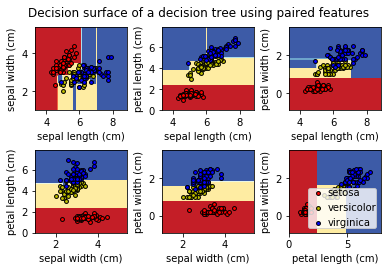

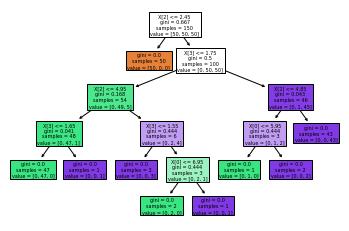

In [0]:
#Decision tree algorithm and plotting decision surface of decision tree

from sklearn.datasets import load_iris
iris_data = load_iris()
# features
iris_X = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
# labels
iris_y = iris_data.target
# check the data has loaded successfully 
print(iris_X.shape)
print(iris_y.shape)
print(iris_data.feature_names)
print('classlabels:', np.unique(iris_y))
from sklearn.model_selection import train_test_split
#using train_test_split function, we randomly split the boston_X and boston_y arrays into 50% test data and 50% training data
# using train_test_split function, we shuffle the training dataset internally before splitting
# via random_state, we provided a fixed random seed (random_state=1) for internal pseudo-random generator used for shuffling dataset prior to splitting
iris_X_train,iris_X_test, iris_y_train, iris_y_test = train_test_split(iris_X,iris_y, test_size=0.5, random_state=1)
#import approriate library
from sklearn.tree import DecisionTreeClassifier
#train a decision tree of max. depth of 4, using Gini impurity as criterion for impurity
tree_model = DecisionTreeClassifier(criterion = 'gini', max_depth=4, random_state=1) 
treefit = tree_model.fit(iris_X_train, iris_y_train)
X_combined = np.vstack((iris_X_train, iris_X_test))
y_combined = np.hstack((iris_y_train, iris_y_test))

#decision surface of a decision tree
from sklearn.tree import plot_tree
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    iris_X = iris_data.data[:, pair]
    iris_y = iris_data.target
    # Train
    clf = DecisionTreeClassifier().fit(iris_X, iris_y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = iris_X[:, 0].min() - 1, iris_X[:, 0].max() + 1
    y_min, y_max = iris_X[:, 1].min() - 1, iris_X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris_data.feature_names[pair[0]])
    plt.ylabel(iris_data.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(iris_y == i)
        plt.scatter(iris_X[idx, 0], iris_X[idx, 1], c=color, label=iris_data.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure()
clf = DecisionTreeClassifier().fit(iris_data.data, iris_data.target)
plot_tree(clf, filled=True)
plt.show()



In [5]:
# Excercise 5 - Regularization

# For regularization in regression we instantiate new models
# Lasso regression is used for L1 Regularization 
#import appropriate statement
from sklearn.linear_model import Lasso

#create lasso regression with alpha value - this is our hyperparameter
regression = Lasso(alpha=0.5)
#fit the linear regression
model_L1 = regression.fit(class_X, class_y)
#Ride regression is L2 Regularization
#import statement
from sklearn.linear_model import Ridge
#create ridge regression with an alpha value
regression = Ridge(alpha=0.5)
#Fit the linear regression
model_l2 = regression.fit(class_X, class_y)

# Part 1
# Get a score for both the models. 
# Compare the results and see if one type of regularization works better than another.
Lasso_score = model_L1.score(X_test, y_test)
print('Lasso Score:\n', Lasso_score)
Ridge_score = model_l2.score(X_test, y_test)
print('Ridge Score:\n', Ridge_score)

# Part 2
# Implement ElasticNet estimator
from sklearn.linear_model import ElasticNet
enet = ElasticNet(alpha=0.5, l1_ratio=0.7)
model_l3 = enet.fit(class_X, class_y)
enet_score = model_l3.score(X_test, y_test)
print('enet Score:\n', enet_score)

# Part3
# RidgeCV and LassoCV to explore the best regularization parameters for each estimator
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1])
model_l4 = ridgecv.fit(class_X, class_y)
ridgecv_score = model_l4.score(class_X, class_y)
print('RidgeCV Score:\n', ridgecv_score)

from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5, random_state=0)
model_l5 = lassocv.fit(class_X, class_y)
lassocv_score = model_l5.score(class_X, class_y)
print('LassoCV Score:\n', lassocv_score)

# Part 4
# Which parameters can be set to help prevent overfitting in DecisionTreeClassifier
To avoid overfitting due to very deep tree with many modes, we can typically prune setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree. 

Lasso Score:
 0.5824055808265075
Ridge Score:
 0.7114428906761474
enet Score:
 0.6027404700941736
RidgeCV Score:
 0.7699548108739226
LassoCV Score:
 0.6617948384330969


In [52]:
# Excercise 6 - Optimizing parameters
# Implementation of RandomizedSearchCV - use this method to search over defined hyperparameters, like GridSearchCV, however a fixed number of parameters are sampled, as defined by n_iter parameter.
# import libraries - note we use scipy for generating a uniform distribution
# hide all warnings
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
#create logistic regression
logistic = LogisticRegression()
from pprint import pprint
print('Parameters currently in use:\n')
pprint(logistic.get_params())
# creare hyperparameters as a list, as in type regularization penalty
penalty = ['l1', 'l2']
# or as a distributor of values to sample from -'C' is the hyperparameter controlling the size of the regularisation penalty
C = uniform(loc=0, scale=4)
# we need to pass these parameters as a dictornary of {param_name: values}
hyperparameters = dict(C=C, penalty=penalty)
print(hyperparameters)
#instantiate our model
randomizedsearch = RandomizedSearchCV(logistic, hyperparameters, random_state=1, n_iter=200, cv=5, verbose=0, n_jobs=-1)
#fit the model
best_model = randomizedsearch.fit(class_X, class_y)
print(best_model)

# Part 1
# find out what the best parameters were
# predict using the best estimator returned by the search

# best_params = Parameter setting that gave the best results on the hold out data.
bestparam = best_model.best_params_
print('Best Parameters:\n', bestparam)
# best_estimator = Estimator that was chosen by the search, i.e. estimator which gave highest score (or smallest loss if specified) on the left out data.
bestestimator = best_model.best_estimator_
print('best estimator:\n', bestestimator)
# best_score = Mean cross-validated score of the best_estimator.
bestestimator_score = bestestimator.score(class_X, class_y)
print('Best Estimator Score:\n', bestestimator_score)

Parameters currently in use:

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}
{'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f72e7929588>, 'penalty': ['l1', 'l2']}
RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.00

In [54]:
# Part 2: Implement RandomSearchCV on the Boston dataset
# hide all warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Lasso
from scipy.stats import uniform # used to generate parameters
from sklearn.model_selection import RandomizedSearchCV
# instantiate model
LASSO = Lasso()
from pprint import pprint
print('Parameters currently in use:\n')
pprint(LASSO.get_params())
# generate hyper-parameters
alpha = [0.1,0.2,0.3,0.4,0.5,1]
fit_intercept = [True, False]
# create  a dictionary of hyperparameters
hyperparameters = dict(alpha=alpha, fit_intercept=fit_intercept)
# instantiate random search model
randomizedsearch = RandomizedSearchCV(LASSO, hyperparameters, random_state=1, n_iter=100, cv=5, verbose=0,n_jobs=-1)
# fit the model to the data
best_model_boston = randomizedsearch.fit(boston_X, boston_y)
bestparam_boston = best_model_boston.best_params_
print('Boston Best Parameters:\n', bestparam_boston)
# best_estimator = Estimator that was chosen by the search, i.e. estimator which gave highest score (or smallest loss if specified) on the left out data.
bestestimator_boston = best_model_boston.best_estimator_
print('Boston best estimator:\n', bestestimator_boston)
# best_score = Mean cross-validated score of the best_estimator.
bestestimator_score = bestestimator_boston.score(boston_X, boston_y)
print('Boston Best Estimator Score:\n', bestestimator_score)

Parameters currently in use:

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}
Boston Best Parameters:
 {'fit_intercept': True, 'alpha': 1}
Boston best estimator:
 Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)
Boston Best Estimator Score:
 0.6825842212709925


In [61]:
# Excercise 7- Ensemble models
# They combine different classifiers into a meta-classifier that has better generalization performance than each individual classifier alone
# Several different approaches to achieve this, including majority voting ensemble methods, which we select the class label that has been predicted by the majority of classifiers.
# The ensemble can be built from different classification algorithms, such as decision trees, support vector machines, logistic regression classifiers, and so on. Alternatively, we can also use the same base classification algorithm, fitting different subsets of the training set.
# Indeed, Majority voting will work best if the classifiers used are different from each other and/or trained on different datasets (or subsets of the same data) in order for their errors to be uncorrelated.

#import classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# create models
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

# An ensemble of them
# here we select hard voting, which returns the majority of the predictions, not an average of probabilities
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svm', svm_clf)], voting='hard')

# we can cycle throgh individual estimators
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):

#fit the training set
  clf.fit(X_train, y_train)

#predict
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


LogisticRegression 0.9052631578947369
RandomForestClassifier 0.9368421052631579
SVC 0.9087719298245615
VotingClassifier 0.9368421052631579
